<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_28_Intervalo_de_confianza_de_la_proporci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Calcular intervalos e confianza de la proporción

# Descripción

A partir de datos muestrales, para este caso se pretente inferri acerca del intervlo de confianza de la proporción sobre una pobación.

El proceso del caso incluye:

* Descripción del fundamento teórico
* Cargar librerías
* Cargar funciones
* Descripcón de ejercicio que incluye e contexto
* Inicializar datos
* Cálculo del intervalo de confanza
* Interpretación de resultados de cada ejercicio
* Interpretació del caso



# Fundamento teórico

El intervalo de confianza de la proporción es un rango estimado dentro del cual se espera que esté la proporción verdadera de una población, con cierto nivel de confianza.

Por ejemplo, si se quiere estimar la proporción de personas que prefieren un producto sobre otro en una población, se puede obtener una muestra y calcular la proporción muestral.

El intervalo de confianza de la proporción proporciona un rango en el que es probable que se encuentre la verdadera proporción en la población general.

Para determinar intervalo de confianza de una proporción sería similar al intervalo de confianza de una media poblacional solo que haciendo uso de la desviación de la proporción.

## Fórmula para estimar el intervalo de confianza de la proporción

Todo a partir de la fórmula del intervalo de confianza de la media pobacional del caso 26.

$$
IC_{media} = \bar{x} \pm {\text{(ME=Margen de Error})}
$$

$$
IC_{media} = \bar{x} \pm z \cdot  (\sqrt{\text{ER=Error Estándar}})
$$

$$
IC_{media} = \bar{x} \pm z \cdot \sqrt{\frac{\sigma}{n}}
$$

Ahora fórmula para estimar el intervalo de confianza de la proporción.

$$
IC_{proporción} = p \pm Z \cdot \sqrt{\frac{p\times q}{n}}
$$

Dónde:

* IC es el intervalo de confianza.
* IC_{proporción} es intervalo de proporción calculado a partur de la fórmula con los estadísticos adecuados.
* $p$ es la proporción muestral.
* $q$ es el complemento de la proporción, de tal forma que $p + q = 1$ es igual a la unidad
* $𝑛$ es el tamaño de la muestra.
* $Z$ es el valor crítico de la distribución normal estándar para el nivel de confianza deseado.

| % Confianza|Valor crítico de Z|
|------------|------------------|
| 80%        | 1.2816           |
| 90%        | 1.645            |
| 95%        | 1.960            |
| 99%        | 2.576            |






## Cargar librerías

In [1]:
import numpy as np
from scipy.stats import norm

import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## Cargar funciones

In [12]:
def f_visualizar_dens_area_normal_z(confianza, ax):
    z = np.linspace(-3.5, 3.5, 1000)  # Valores de z para la gráfica
    densidad = stats.norm.pdf(z)  # Densidad de probabilidad

    # Valores críticos de z para el nivel de confianza dado
    alfa = 1 - confianza
    z_critico = stats.norm.ppf(1 - alfa/2)

    # Área de la cola izquierda
    area_izquierda = stats.norm.cdf(-z_critico)
    # Área de la cola derecha
    area_derecha = 1 - stats.norm.cdf(z_critico)

    # Visualización
    ax.plot(z, densidad, 'b-', label='Densidad de probabilidad')
    ax.fill_between(z, densidad, where=(z <= -z_critico), color='red', alpha=0.5, label=f'Área {alfa/2:.4f} izquierda')
    ax.fill_between(z, densidad, where=(z >= z_critico), color='red', alpha=0.5, label=f'Área {alfa/2:.4f} derecha')
    ax.axvline(-z_critico, color='black', linestyle='--', label=f'Z crítico: +-{z_critico:.4f}')
    ax.axvline(z_critico, color='black', linestyle='--')
    ax.set_xlabel('Z')
    ax.set_ylabel('Densidad de probabilidad')
    ax.set_title(f'Distribución normal estándar al {confianza:.2f}% de confianza')
    ax.legend()
    ax.grid(False)

def f_IC_proporcion(confianza, p, n):
    alpha = 1 - confianza
    Z = stats.norm.ppf(1 - alpha/2)  # Valor crítico de la distribución normal estándar
    error_estandar = np.sqrt((p*(1-p))/n)
    margen_error = (Z * error_estandar)
    limite_inferior = p - margen_error
    limite_superior = p + margen_error
    return margen_error, error_estandar, limite_inferior, limite_superior

In [5]:
confianza = [0.80, 0.90, 0.95, 0.99]
# Calcular el valor crítico de la distribución normal estándar
z_critico = np.abs(norm.ppf((1 - np.array(confianza)) / 2)) # dos colas
# print (z_critico)
z_critico_izq = -(z_critico)
z_critico_der = z_critico
confianzas_z = pd.DataFrame({'confianza':confianza, 'z critico':np.round(z_critico, 6),
                            'z crítico izq':np.round(z_critico_izq, 6), 'z crítico der':np.round(z_critico_der, 6)})
print ("Valor de nivels de confianza y valores de z a dos colas")
print (confianzas_z)

Valor de nivels de confianza y valores de z a dos colas
   confianza  z critico  z crítico izq  z crítico der
0       0.80   1.281552      -1.281552       1.281552
1       0.90   1.644854      -1.644854       1.644854
2       0.95   1.959964      -1.959964       1.959964
3       0.99   2.575829      -2.575829       2.575829


## Vissualmente valores de z


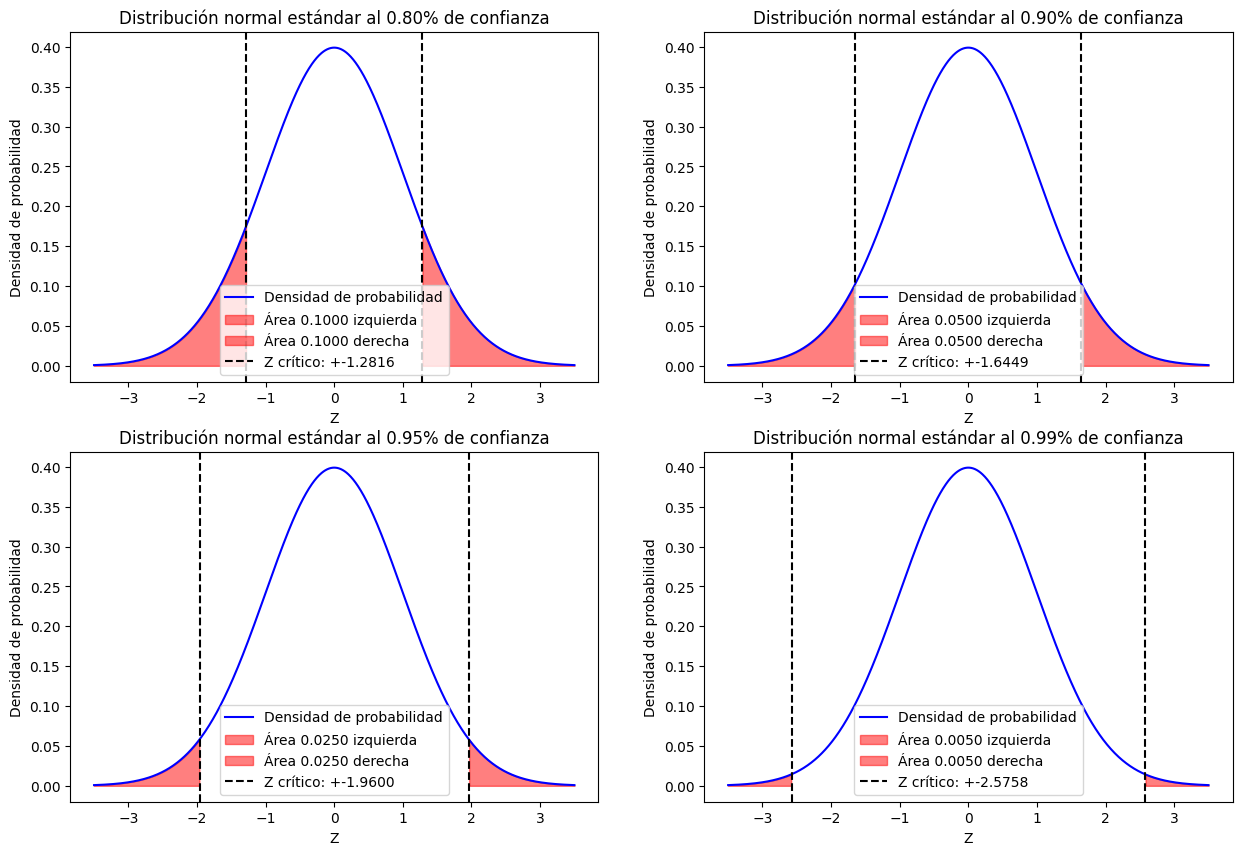

In [7]:
# Crear una matriz de subplots 2x2
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Visualizar la distribución normal estándar para diferentes niveles de confianza en cada subplot
f_visualizar_dens_area_normal_z(0.80, axs[0, 0])
f_visualizar_dens_area_normal_z(0.90, axs[0, 1])
f_visualizar_dens_area_normal_z(0.95, axs[1, 0])
f_visualizar_dens_area_normal_z(0.99, axs[1, 1])

# Desarrollo

## Ejercicio 1. Proporción de Calentamento global.

Se desea estimar la proporción de personas que piensan que el calentamiento global es un problema muy serio.

En una muestra aleatoria de $n=100$ adultos, $p = 73$% de la muestra indicaron que, de lo que han oído o leído, el calentamiento global es un problema muy serio.

Se determina una estimación verdadera proporción de población de adultos que piensan que el calentamiento global es un problema muy serio y se calcula el margen de error para la estimación.

El parámetro de interés es ahora $p$, la proporción de personas en la población que piensan que el calentamiento global es un problema muy serio. El mejor estimador de $p$ es la proporción muestral $\bar{p}$ que para esta muestra es p. ̅  

El nivel de confianza es al $95$% y se utiliza la distribución normal estandarizada para obtener el valor de z:

Los datos:

* $ p=0.73$
* $ q=1 - p = 0.27$
* $\bar{p}=p=0.73$
* $n=100$
* $confianza =95%$
$$\therefore$$

$$
\text{IC}(\bar{p}) = \bar{p} \pm z^* \sqrt{\frac{p \cdot q}{n}}
$$

$$
\text{IC}(\bar{p}) = 0.73 \pm 1.9599 \times \sqrt{\frac{0.73 \times 0.27}{100}}
$$


$$
\text{IC}(\bar{p}) = 0.73 \pm 1.9599 \times \sqrt{0.001971}
$$


$$
\text{IC}(\bar{p}) = 0.73 \pm 1.9599 \times 0.04439595
$$

El error estándar (ES) es 0.04439595, el margen de error (ME) es 0.08701162:
$$
IC(\bar{p})= 0.73± 0.087
$$

$$
IC(\bar{p})= 0.73- 0.087=0.642$$

$$
 IC(\bar{p})= 0.73+0.087=0.817
$$

Y finalmente, el intervalo de confianza de la proporción al $95$% es: $0.642$ y $0.8175$, con estimación de la proporción de la muestra $0.73$.


In [16]:
confianza = 95/100
proporcion = 0.73
n = 100

margen_error, error_estandar, IC1, IC2 = f_IC_proporcion(confianza, proporcion, n)
print ("Intervalo de confianza de la proporción: ")
print (np.round(IC1, 4), np.round(IC2, 4))
print ("Margen de Error y Error Estándar: ")
print (np.round(margen_error, 4), np.round(error_estandar, 4))

Intervalo de confianza de la proporción: 
0.643 0.817
Margen de Error y Error Estándar: 
0.087 0.0444


El intervalo de estimación de $0.643$ a $0.817$ significa que hay en una confianza del $95$% de que hay de un $64$% a un $81$% de que la gente piensa que si existe calentamiento global en el planeta con un error muestral de $0.087$

## Ejercicio 2. Proporción de popularidad del presidente

Una muestra aleatoria de $n=2500$ personas, a quienes se les pregunta si creen que el presidente de X organización incluyendo un gobierno debe renunciar, el $60$% de la gente considera que SI.

Ahora se plantea la necesidad de encontrar un intervalo de la proporción con $95$% de confianza para poder estimar el intervalo de la proporción $p$ de toda la población que diría SÍ.

In [17]:
confianza = 95/100
proporcion = 0.60
n = 2500

margen_error, error_estandar, IC1, IC2 = f_IC_proporcion(confianza, proporcion, n)
print ("Intervalo de confianza de la proporción: ")
print (np.round(IC1, 4), np.round(IC2, 4))
print ("Margen de Error y Error Estándar: ")
print (np.round(margen_error, 4), np.round(error_estandar, 4))

Intervalo de confianza de la proporción: 
0.5808 0.6192
Margen de Error y Error Estándar: 
0.0192 0.0098


El intervalo de estimación de $0.5808$ a $0.6192$ significa que hay en una confianza del $95$% de que hay de un $58$% a un $61$% de que la gente piensa que el presidente debe retirarse de su cargo un error muestral de $0.0192$ y error estándar de $0.0098$

In [ ]:
# Pendiente

## Ejercicio 3. Divorcios

En una muestra aleatoria de $n=1000$ personas, están a favor del divorcio el $65$%. Se calcula con un $95$% de confianza el intervalo para la proporción real en la población.

En una encuesta realizada un año antes se había encontrado un 69% de casos favorables al divorcio. ¿Cae este valor dentro del intervalo de la actual encuesta? ¿Qué interpretación se da al resultado?

Hay que averiguar si el $0.69$ de la encuesta anterior, cae dentro del intervalo de confianza actual.

In [18]:
confianza = 95/100
proporcion = 0.65
n = 1000

margen_error, error_estandar, IC1, IC2 = f_IC_proporcion(confianza, proporcion, n)
print ("Intervalo de confianza de la proporción: ")
print (np.round(IC1, 4), np.round(IC2, 4))
print ("Margen de Error y Error Estándar: ")
print (np.round(margen_error, 4), np.round(error_estandar, 4))

Intervalo de confianza de la proporción: 
0.6204 0.6796
Margen de Error y Error Estándar: 
0.0296 0.0151


El valor del $69$% de la encuesta anterior no cae dentro del intervalo actual, por lo que puede pensarse que a un $95$% de confianza la población piensa y está a favor del divorcio en un intervalo de $62$% a $67$% aproximadamente con un margen de error o error muestral de $0.0296$.

# Interpretación

* ¿ Qué interpretación o significado el valor del Error Estándar en un intervalo de confianza?
* ¿ Qué interpretación o significado tiene el valor del Margen de Error en un intervalo de confianza?
* Para qué sirve la distribución z normal estándar en el cálculo de los intervalos de confianza?
* En el ejercicio 1, con los mismos datos iniciales, ¿cúal es el intervalo de confianza de la proporción a un 90% y un 99% de confianza? y ¿cuál es la interpretación ?
* En el ejercicio 2, con los mismos datos iniciales, ¿cúal es el intervalo de confianza de la proporción a un 90% y un 99% de confianza? y ¿cuál es la interpretación ?
* En el ejercicio 3, con los mismos datos iniciales, ¿cúal es el intervalo de confianza de la proporción a un 90% y un 99% de confianza? y ¿cuál es la interpretación ?





# Bibliografía

* Anderson, D., Sweeney, D., & Williams, T. (2008). Estadística para administración y economía Estadística para administración y economía. 10a. Edición. México, D.F: Cengage Learning Editores,S.A. de C.V.
* Devore, J. L. (2018). Fundamentos de Probabilidad y Estadística. California Polytechnic State University, San Luis Obispo: CENCAGE.
* Mendenhall, W., Beaver, R. J., & Beaver, B. M. (2010). Introducción a la probabilidad y estadística. México, D.F.: Cengage Learning Editores, S.A. de C.V.


